# Part 2: Let's Help Santa

In [2]:
library("igraph")

### Question 6:

In [4]:
g <- read.graph("./data/uber/uberGraph.txt", format="ncol", directed=FALSE)
info <- sprintf("It has %d nodes and %d edges", vcount(g), ecount(g))
cat(info)

It has 1887 nodes and 311812 edges

In [5]:
# Add attributes

ID_streetName <- rep("", vcount(g))
ID_coordinate <- rep(list(c(1, 2)), vcount(g))
file_uberGraph_info <- file("./data/uber/uberGraph_info.txt", open="r")
line <- readLines(file_uberGraph_info, 1, encoding="latin1")

while(length(line) != 0) {
    line <- strsplit(line, "\t\t")
    ID <- line[[1]][1]
    streetName <- line[[1]][2]
    coordinate <- list(c(as.numeric(line[[1]][3]), as.numeric(line[[1]][4])))

    node_id <- V(g)[V(g)$name == ID]
    ID_streetName[node_id] <- streetName
    ID_coordinate[node_id] <- coordinate
    
    line <- readLines(file_uberGraph_info, 1, encoding="latin1")
} 

close(file_uberGraph_info)
V(g)$displayName <- ID_streetName
V(g)$location <- ID_coordinate

In [6]:
g.components <- clusters(g)
giant.idx <- which.max(g.components$csize)
g <- induced.subgraph(g, which(g.components$membership == giant.idx))

info <- sprintf("It has %d nodes and %d edges", vcount(g), ecount(g))
cat(info)

It has 1880 nodes and 311802 edges

### Question 7:

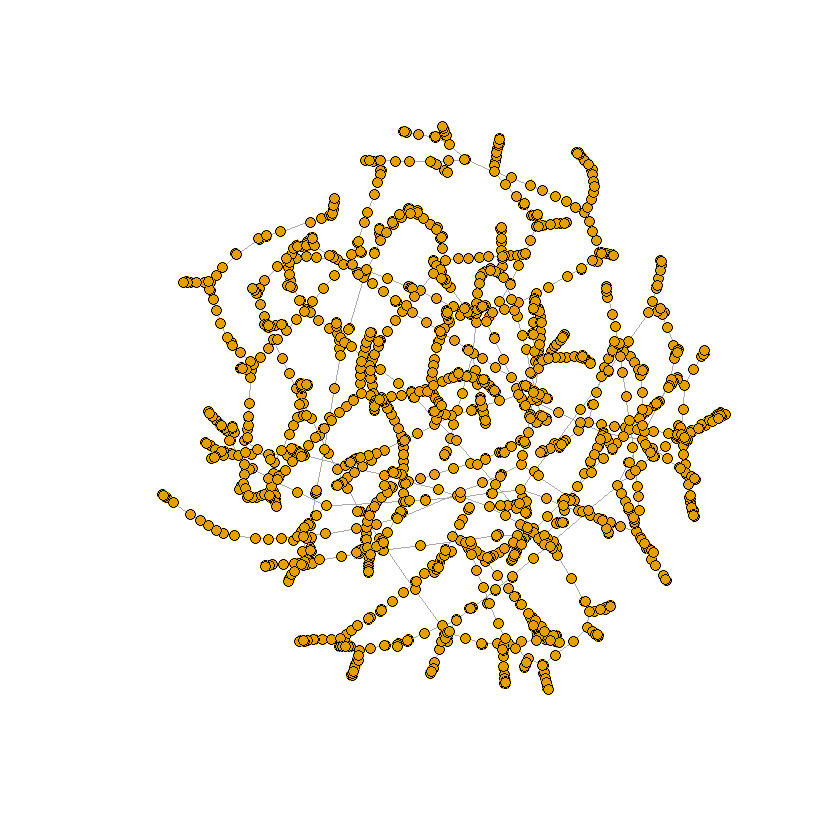

In [7]:
MST <- mst(g)
plot(MST, vertex.label=NA, vertex.size=4)

In [8]:
idx <- 1:ecount(MST)
idx_sample <- sample(idx, size=10, replace=FALSE)

for(ID in idx_sample){
    source <- V(MST)[get.edges(MST, E(MST)[ID])[1]]
    target <- V(MST)[get.edges(MST, E(MST)[ID])[2]]
    
    info <- sprintf("%s --- %s Takes %f seconds\n", source$displayName, target$displayName, E(MST)[ID]$weight)
    cat(info)
}

200 Genoa Court, Vallejo --- 200 Kirkland Ranch Road, American Canyon Takes 230.630000 seconds
3500 Brooks Avenue, Santa Rosa --- 200 Firethorn Drive, Rohnert Park Takes 228.160000 seconds
400 Monti Circle, Pleasant Hill --- 0 Bartlett Court, Pleasant Hill Takes 243.385000 seconds
Ed Taylor Trail, Burlingame Hills, Burlingame --- 1200 Manzanita Drive, Millbrae Takes 74.340000 seconds
1400 Essex Way, West San Jose, San Jose --- 4000 Moreland Way, West San Jose, San Jose Takes 148.945000 seconds
400 East Tabor Avenue, Fairfield --- 2000 Thrush Way, Fairfield Takes 120.565000 seconds
2400 Vine Hill Drive, Napa --- 1600 El Centro Avenue, Napa Takes 169.535000 seconds
21800 Tanglewood Drive, Castro Valley --- 22000 Cameron Street, Castro Valley Takes 99.675000 seconds
1200 Halyard Drive, West Sacramento --- Road 107A, West Sacramento Takes 89.750000 seconds
Seaborg Road, Berkeley --- 1700 Scenic Avenue, Northside, Berkeley Takes 125.960000 seconds


### Question 9:

In [9]:
result <- dfs(MST, 500)
trajectory <- result$order
for(i in 1:length(trajectory)){
    info <- sprintf("%s\n", trajectory[i]$displayName)
    cat(info)
}

200 Walnut Street, Presidio Heights, San Francisco
700 Presidio Avenue, Western Addition, San Francisco
2500 Turk Street, Richmond District, San Francisco
0 Rossi Avenue, Richmond District, San Francisco
600 3rd Avenue, Richmond District, San Francisco
200 3rd Avenue, Richmond District, San Francisco
800 Balboa Street, Richmond District, San Francisco
1500 Balboa Street, Richmond District, San Francisco
200 16th Avenue, Richmond District, San Francisco
200 21st Avenue, Central Richmond, San Francisco
300 26th Avenue, Central Richmond, San Francisco
3200 Anza Street, Richmond District, San Francisco
2300 Cabrillo Street, Richmond District, San Francisco
700 32nd Avenue, Richmond District, San Francisco
7100 Geary Boulevard, Richmond District, San Francisco
7700 Geary Boulevard, Richmond District, San Francisco
700 La Playa Street, Richmond District, San Francisco
1200 El Camino Del Mar, Sea Cliff, San Francisco
200 9th Avenue, Richmond District, San Francisco
0 McLaren Avenue, Sea Cliff

In [34]:
w_list <- rep(0, length(E(g)))
d_list <- rep(0, length(E(g)))
for(i in length(E(g))){
    v1 <- V(g)[get.edges(g, E(g)[i])[1]]
    v2 <- V(g)[get.edges(g, E(g)[i])[2]]
    w <- E(g)[i]$weight
    w_list[i] <- w
    
    l1 <- v1$location
    l2 <- v2$location
    d <- sqrt((l1[[1]][1] - l2[[1]][1])*(l1[[1]][1] - l2[[1]][1]) + (l1[[1]][2] - l2[[1]][2])*(l1[[1]][2] - l2[[1]][2]))
    d_list[i] <- d
}

d_sum <- sum(d_list)
w_sum <- sum(w_list)
ratio <- w_sum / d_sum

In [35]:
cost_list <- rep(0, length(trajectory)-1)
cost_approximate <- 0
for(i in 1:(length(trajectory)-1)){
    v1 <- trajectory[i]
    v2 <- trajectory[i+1]
    
    if(length(E(g)[v1$name %--% v2$name]$weight) == 0){
        l1 <- v1$location
        l2 <- v2$location
        d <- sqrt((l1[[1]][1] - l2[[1]][1])*(l1[[1]][1] - l2[[1]][1]) + (l1[[1]][2] - l2[[1]][2])*(l1[[1]][2] - l2[[1]][2]))
        weight <- ratio * d
    }else{
        weight <- E(g)[v1$name %--% v2$name]$weight
    }
    
    cost_list[i] <- weight
    cost_approximate <- cost_approximate + cost_list[i]
}
print(cost_approximate)

[1] 452546.2


In [37]:
cost_optimal <- sum(E(MST)$weight)
performance <- cost_approximate / cost_optimal
print(performance)

[1] 1.61966
